# Codebook
Documenting existing data files of DaanMatch with information about location, owner, "version", source etc.<br>
**Authors**: Erica Wo, Sanik Malepati, Patrick Guo

## Import Libraries and Load Data

In [5]:
import pandas as pd
import numpy as np
import boto3
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import io
import string

In [6]:
client = boto3.client('s3')
resource = boto3.resource('s3')
my_bucket = resource.Bucket('daanmatchdatafiles')

path = 's3://daanmatchdatafiles/from Shekhar/Final_Data_givingtuesdayindia.org.xlsx'
obj = client.get_object(Bucket='daanmatchdatafiles', Key='from Shekhar/Final_Data_givingtuesdayindia.org.xlsx')
df = pd.read_excel(io.BytesIO(obj['Body'].read()))

# Final_Data_givingtuesdayindia.org

## About this dataset
Data provided by: Unknown. <br>
Source: https://daanmatchdatafiles.s3.us-west-1.amazonaws.com/DaanMatch_DataFiles/Final_Data_givingtuesdayindia.org+(1).xlsx <br>
Type: xlsx <br>
Last Modified: May 29, 2021, 19:54:02 (UTC-07:00) <br>
Size: 614.2 KB <br>

## What's in this dataset?

In [7]:
print("Shape:", df.shape)
print("Rows:", df.shape[0])
print("Columns:", df.shape[1])
print("Each row is a NGO.")

Shape: (926, 23)
Rows: 926
Columns: 23
Each row is a NGO.


## Codebook

In [14]:
dataset_columns = [column for column in df.columns]
dataset_desc = ["Url",
               "NGO Name",
               "More common name for the NGO",
               "Year of Establishment",
               "Guidestar URL",
               "Number of Full Time Staff",
               "Number of Full Time Volunteers",
               "Brief Description of NGO",
                'Annual Expenditure in lakhs (hundred thousand) of rupees',
                 'Year for Annual Expenditure',
                 'Impact',
                 'Profile pic',
                 'Organisation Website',
                 'Email',
                 'Telephone/ Mobile number',
                 'Correspondence  Address',
                 'Phone',
                 'Cause(s)',
                 'Nature of Intervention',
                 'Beneficiaries',
                 'Focus',
                 'Area of Operation: State',
                 'Payment Account Number']
dataset_dtypes = [dtype for dtype in df.dtypes]

data = {"Column Name": dataset_columns, "Description": dataset_desc, "Type": dataset_dtypes}
codebook = pd.DataFrame(data)
codebook.head(10)

,Column Name,Description,Type
0,Url,Url,object
1,NGO Name,NGO Name,object
2,Popular Name,More common name for the NGO,object
3,Year of Establishment,Year of Establishment,int64
4,GuideStar URL,Guidestar URL,object
5,Full Time Staff,Number of Full Time Staff,float64
6,Full Time Volunteers,Number of Full Time Volunteers,float64
7,Brief description,Brief Description of NGO,object
8,Annual Expenditure (Rs in lacs),Annual Expenditure in lakhs (hundred thousand)...,object
9,Year for Annual Expenditure,Year for Annual Expenditure,object


## Object Type Error in "Full Time Staff" column

In [9]:
df['Full Time Staff'].unique()

array([70, 3, nan, 29, 10, 53, 15, 30, 4, 18, 1, 6, 21, 20, 38, 75, 65,
       14, 7, 74, 210, 35, 25, 36, 5, 8, 34, 13, 155, 55, 12, 243, 27, 23,
       111, 100, 98, 45, 43, 90, 16, 163, 28, 11, 1300, 150, 2, 359, 148,
       131, 50, 17, 9, 117, 0, 40, 82, 32, 39, 47, 87, 195, 63, 69, 2000,
       1140, 646, 1100, 330, 193, 46, 24, 230, 334, 95, 192, 96, 180, 54,
       60, 66, 86, 62, 41, 94, 19, 479, 22, 261, 67, 114, 127, 125, 33,
       52, 42, 280, 120, 37, 78, 61, 708, 31, 102, 72, 138, 56, 231, 478,
       49, 145, 575, 250, 123, 80, 240, 290, 200, 272, 103, 515, 610, 105,
       300, 128, 57, 68, 44, 51, 110, 1200, 26, 129, '13 Project staff',
       291, 827, 107, 173, 1559, 162, 256, 607, 109, 542, 116, 393, 121,
       286, 651, 134, 59, 1187, 415, 137, 1045, 101, 450, 1688, 84, 5132,
       216, 130, 761, 160, 1600, 189, 91, 93, 949, 141, 88], dtype=object)

Discrepency found at position 760 in which its "Full Time Staff" value is "13 Project staff" as opposed to the float values in all the other rows. 

In order to make the data more consistent and be able to analyze it more, I decided to change its value to 13 and convert all "Full Time Staff" values from object dtypes to float64. 

In [12]:
# df.iloc[760]
df.at[760, 'Full Time Staff']=13
df['Full Time Staff'] = pd.to_numeric(df['Full Time Staff'])

In [13]:
updated_dataset_dtypes = [dtype for dtype in df.dtypes]
updated_data = {"Column Name": dataset_columns, "Description": dataset_desc, "Type": updated_dataset_dtypes}
updated_codebook = pd.DataFrame(updated_data)
updated_codebook

,Column Name,Description,Type
0,Url,Url,object
1,NGO Name,NGO Name,object
2,Popular Name,More common name for the NGO,object
3,Year of Establishment,Year of Establishment,int64
4,GuideStar URL,Guidestar URL,object
5,Full Time Staff,Number of Full Time Staff,float64
6,Full Time Volunteers,Number of Full Time Volunteers,float64
7,Brief description,Brief Description of NGO,object
8,Annual Expenditure (Rs in lacs),Annual Expenditure in lakhs (hundred thousand)...,object
9,Year for Annual Expenditure,Year for Annual Expenditure,object


## Missing Values

In [15]:
df.isnull().sum()

Url                                  0
NGO Name                             0
Popular Name                       288
Year of Establishment                0
GuideStar URL                        1
Full Time Staff                    153
Full Time Volunteers               262
Brief description                   20
Annual Expenditure (Rs in lacs)    762
Year for Annual Expenditure        748
Impact                             460
Profile pic                        740
Organisation Website               131
Email                                1
Telephone/ Mobile number           253
Correspondence  Address             72
Phone                              807
Cause(s)                            27
Nature of Intervention              14
Beneficairies                       26
Focus                               33
Area of Operation: State           150
PAN                                  0
dtype: int64

## Summary Statistics

In [16]:
df.describe()

,Year of Establishment,Full Time Staff,Full Time Volunteers
count,926.000000,773.000000,664.000000
mean,2464.767819,75.618370,159.347892
std,14121.819071,261.424938,1289.265298
min,1922.000000,0.000000,0.000000
25%,1994.000000,7.000000,3.000000
50%,2002.000000,18.000000,8.000000
75%,2010.000000,50.000000,25.000000
max,431731.000000,5132.000000,24450.000000


# Columns

## URL

Many, if not all, URLs are invalid

In [18]:
url = df['Url']
url

0      https://www.givingtuesdayindia.org/ngo-detail/...
1      https://www.givingtuesdayindia.org/ngo-detail/...
2      https://www.givingtuesdayindia.org/ngo-detail/...
3      https://www.givingtuesdayindia.org/ngo-detail/...
4      https://www.givingtuesdayindia.org/ngo-detail/...
                             ...                        
921    https://www.givingtuesdayindia.org/ngo-detail/...
922    https://www.givingtuesdayindia.org/ngo-detail/...
923    https://www.givingtuesdayindia.org/ngo-detail/...
924    https://www.givingtuesdayindia.org/ngo-detail/...
925    https://www.givingtuesdayindia.org/ngo-detail/...
Name: Url, Length: 926, dtype: object

In [19]:
# Number of empty strings/missing values
print("Invalid:", sum(url == " ") + sum(url.isnull()))

print("No. of unique values:", len(url.unique()))

# Check for duplicates
counter = dict(Counter(url))
duplicates = { key:[value] for key, value in counter.items() if value > 1}
print("No. of Duplicates:", len(duplicates))

table = pd.DataFrame.from_dict(duplicates)
table = table.melt(var_name="Duplicate URLs", value_name="Count").sort_values(by=["Count"], ascending=False).reset_index(drop=True)
table

Invalid: 0
No. of unique values: 926
No. of Duplicates: 0


,Duplicate URLs,Count


## NGO Name

In [20]:
print("Number of invalid values:", 0)
print("Number of duplicates:", 0)
print("Number of unique values:", 926)

Number of invalid values: 0
Number of duplicates: 0
Number of unique values: 926


In [22]:
duplicates = df[df['NGO Name'].duplicated(keep=False) == True].sort_values(['NGO Name'])
duplicates

,Url,NGO Name,Popular Name,Year of Establishment,GuideStar URL,Full Time Staff,Full Time Volunteers,Brief description,Annual Expenditure (Rs in lacs),Year for Annual Expenditure,...,Email,Telephone/ Mobile number,Correspondence Address,Phone,Cause(s),Nature of Intervention,Beneficairies,Focus,Area of Operation: State,PAN
77,https://www.givingtuesdayindia.org/ngo-detail/...,Association for Rural Development,ARD,1985,https://guidestarindia.org/Summary.aspx?CCReg=...,90.0,40.0,Association for Rural Development (ARD) is a n...,NaN,NaN,...,ardindia2009@gmail.com,NaN,"2/127,ARD Nagar,P.Meenakshipatti,Theni Main Ro...",NaN,"Children, Women",Direct service,"Adolescents, Adults, Artisans, Children, Comme...",Rural & Urban,Tamil Nadu,AAAAA0327K
78,https://www.givingtuesdayindia.org/ngo-detail/...,Association for Rural Development,Nill,1992,https://guidestarindia.org/Summary.aspx?CCReg=...,16.0,30.0,"We a,Registered,Non-Profit,Grass-Root Organisa...",NaN,NaN,...,ard.sriperumbudur@gmail.com,NaN,"50,Patel Street,Mahalakshmi Nagar,ExtII,,\nNan...",NaN,"Children, Disabled, Education, Emergency Relie...","Direct service, Support, Advocacy & Campaignin...","Adolescents, Adults, Animal Lovers",Rural,NaN,AAATA9273H


Although there is 1 duplicate value in the `NGO Name` Column (Association for Rural Development) as shown above, the duplicates are actually 2 different organizations that coincidentally have the same `NGO Name`. <br> <br>  In this case, the same `NGO Name` does not indicate duplicate rows. 

## Popular Name

In [24]:
print("Number of invalid values:", 288)
print("Number of duplicates:", 298) # df['Popular Name'].duplicated().value_counts()
print("Number of unique values:", 628)


Number of invalid values: 288
Number of duplicates: 298
Number of unique values: 628


## Year Of Establishment

In [25]:
df['Year of Establishment'].duplicated().value_counts()

True     863
False     63
Name: Year of Establishment, dtype: int64

In [26]:
max(df['Year of Establishment'])

431731

Number of invalid values: 1 <br>
Number of duplicates: 863 <br>
Number of unique values: 63 <br> 

No null values, but there is one invalid value-- year of establishment is incorrectly entered: 431731 (position 592).

In [27]:
# organizing data to plot

# drop invalid values
year_count = pd.DataFrame(df['Year of Establishment'].value_counts(ascending=True).sort_index())
year_count = year_count.dropna()[0: -1]
year_count_values = year_count['Year of Establishment'].values
year_count.head()

,Year of Establishment
1922,1
1937,1
1940,1
1949,1
1953,3


<Figure size 1440x1440 with 0 Axes>

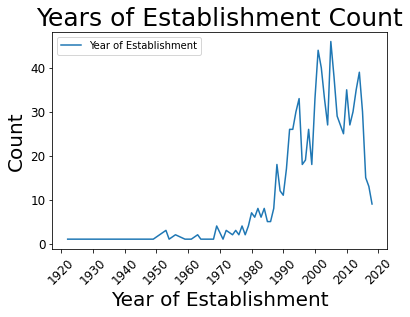

In [33]:
plt.figure(figsize=(20, 20))
ax = year_count.plot()
plt.xticks(np.arange(1920, 2022, 10), size=12, rotation=45)
plt.yticks(size=12)
plt.xlabel("Year of Establishment", size=20)
plt.ylabel("Count", size=20)
plt.title("Years of Establishment Count", size=25)
plt.show()

From the graph above, one can see that there was a boost of NGO's that were established in the early 2000s.

## GuideStar URL

In [34]:
df['GuideStar URL'].isnull().sum()

1

Number of invalid values: 1 null value <br>
Number of duplicates: 0 <br>
Number of unique values: 925 <br>

Many, if not all, links do not work anymore.

In [35]:
guidestar_col = df['GuideStar URL']

In [36]:
# Number of empty strings/missing values
print("Invalid:", sum(guidestar_col == " ") + sum(guidestar_col.isnull()))

print("No. of unique values:", len(guidestar_col.unique()))

# Check for duplicates
counter = dict(Counter(guidestar_col))
duplicates = { key:[value] for key, value in counter.items() if value > 1}
print("No. of Duplicates:", len(duplicates))

Invalid: 1
No. of unique values: 926
No. of Duplicates: 0


## Full Time Staff

In [37]:
staff_num = df['Full Time Staff']
staff_num.head()

0    70.0
1     3.0
2     NaN
3     3.0
4    29.0
Name: Full Time Staff, dtype: float64

In [38]:
# Number of empty strings/missing values
print("Invalid:", sum(staff_num.isnull()))

print("No. of unique values:", len(staff_num.unique()))

Invalid: 153
No. of unique values: 170


Another invalid value:

In [39]:
df.loc[df['Full Time Staff'] == '13 Project staff']

,Url,NGO Name,Popular Name,Year of Establishment,GuideStar URL,Full Time Staff,Full Time Volunteers,Brief description,Annual Expenditure (Rs in lacs),Year for Annual Expenditure,...,Email,Telephone/ Mobile number,Correspondence Address,Phone,Cause(s),Nature of Intervention,Beneficairies,Focus,Area of Operation: State,PAN


In [40]:
# change '13 Project staff' to just 13
df.at[760, 'Full Time Staff'] = 13
df.at[760, 'Full Time Staff']

13.0

In [41]:
# Value Counts
staff_count_df = pd.DataFrame(staff_num.value_counts().sort_index().dropna())
staff_count_df.head()

,Full Time Staff
0.0,15
1.0,21
2.0,25
3.0,22
4.0,35


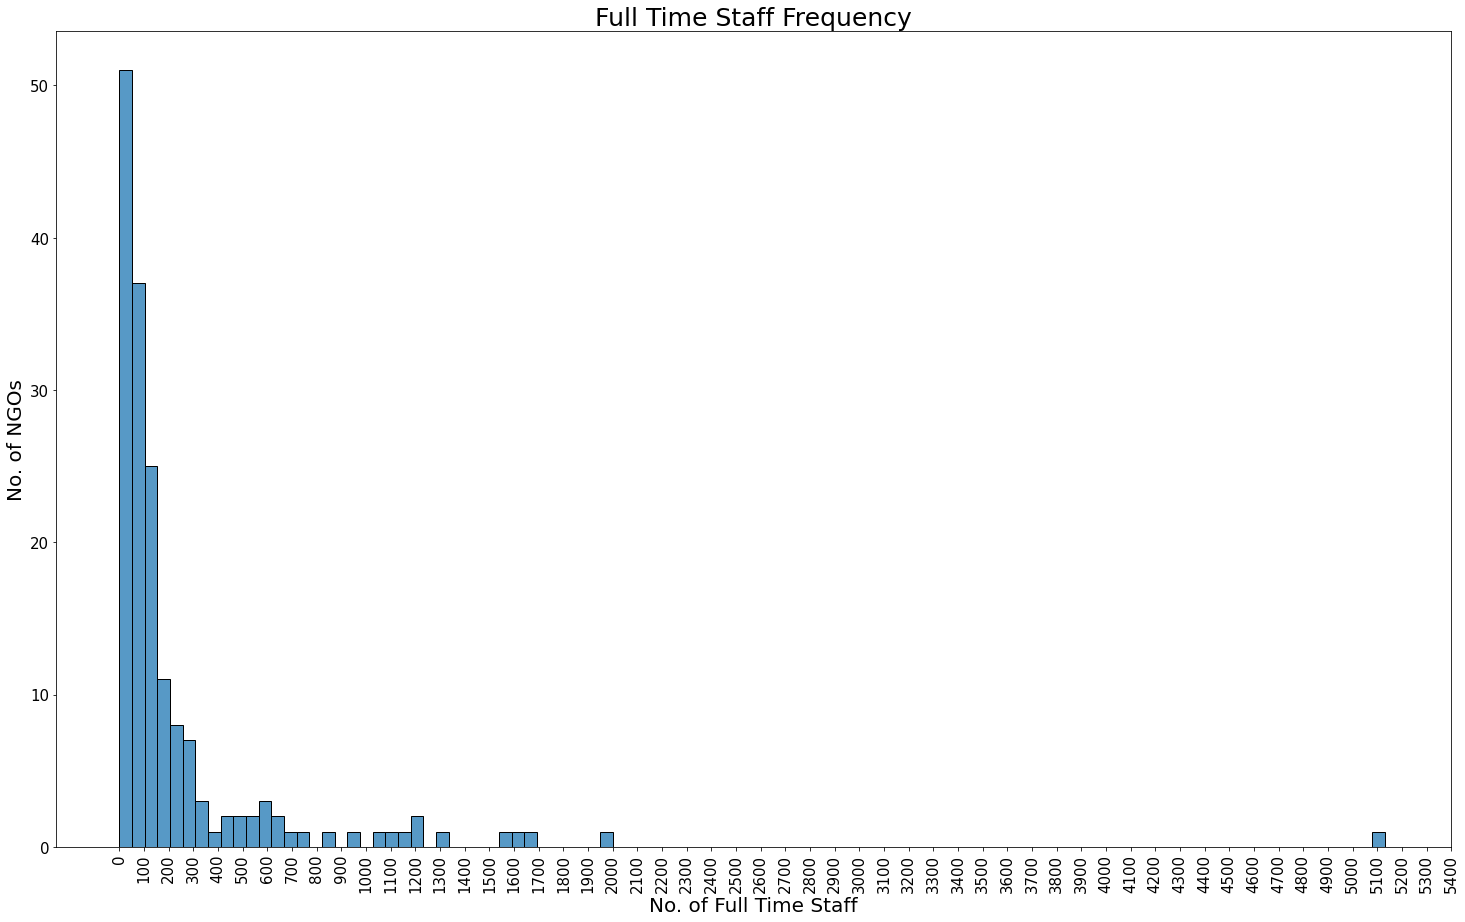

In [42]:
# Show frequency distribution of full time staff members for NGOs
plt.figure(figsize=(25, 15))
ax = sns.histplot(x=staff_count_df.index, data=staff_count_df, bins=100)
plt.xticks(np.arange(0, 5500, 100), size=15, rotation=90)
plt.yticks(size=15)
plt.xlabel("No. of Full Time Staff", size=20)
plt.ylabel("No. of NGOs", size=20)
plt.title("Full Time Staff Frequency", size=25)
plt.show()

As shown in the histogram above, majority of NGOs have less than 200 full time staff members.

## Full Time Volunteers

In [43]:
volunteer_count = df['Full Time Volunteers'].value_counts().dropna()
volunteer_count_df = pd.DataFrame(volunteer_count.sort_index())
volunteer_count_df.head()

,Full Time Volunteers
0.0,80
1.0,31
2.0,45
3.0,34
4.0,32


In [44]:
# Number of empty strings/missing values
print("Invalid:", sum(volunteer_count.isnull()))

print("No. of unique values:", len(volunteer_count.unique()))

Invalid: 0
No. of unique values: 23


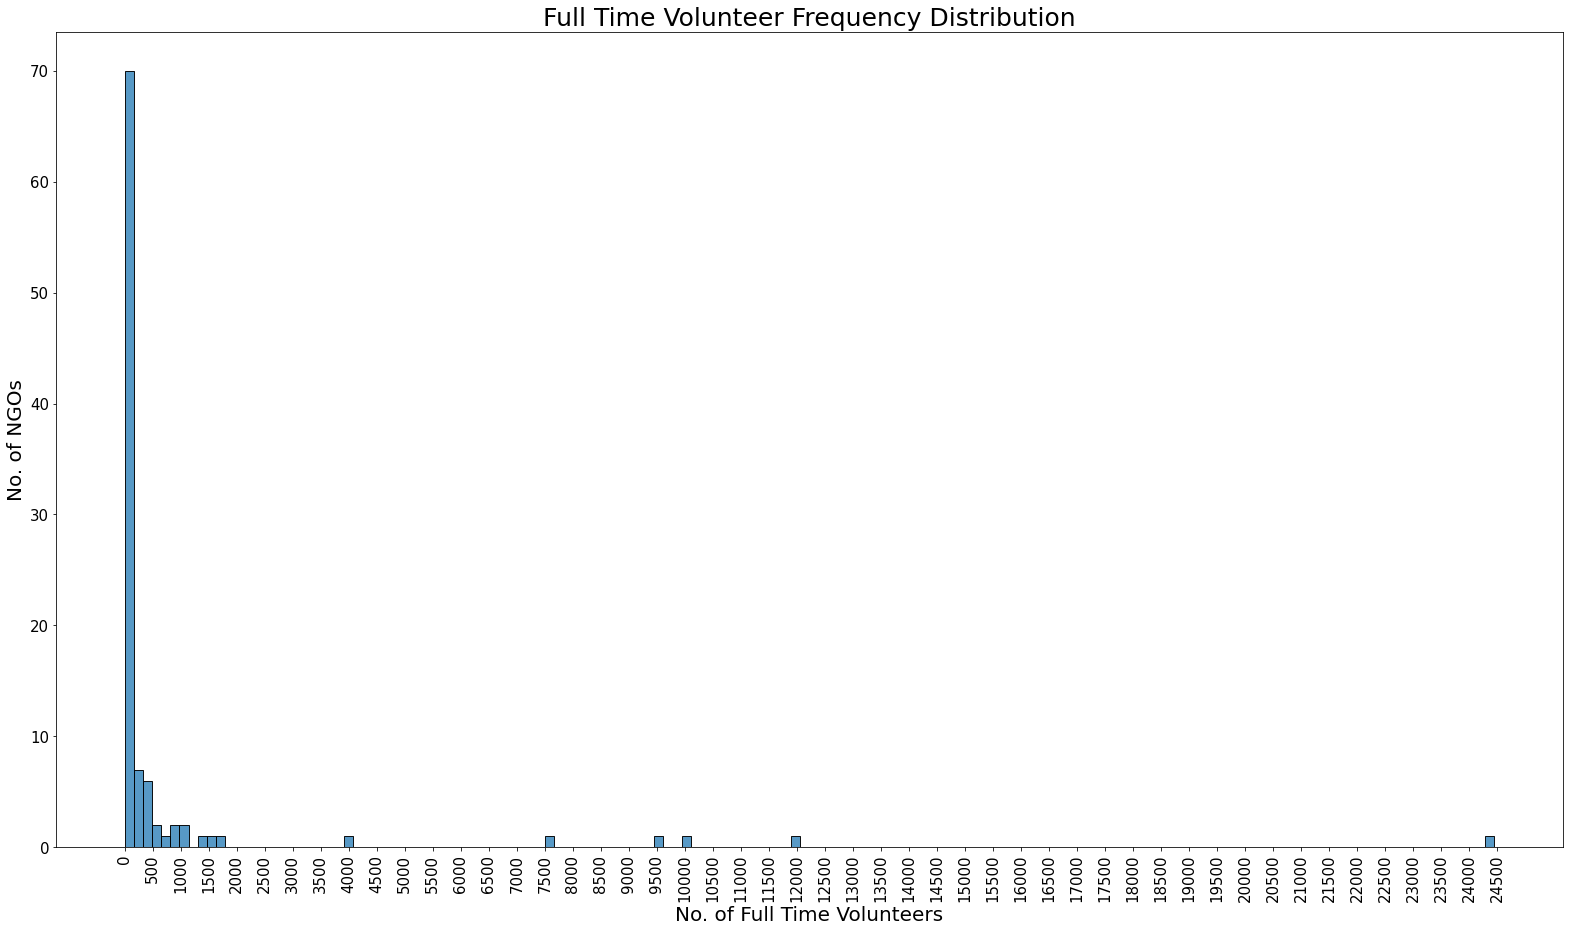

In [45]:
# Show frequency distribution of full time volunteers for NGOs
plt.figure(figsize=(27, 15))
ax = sns.histplot(x=volunteer_count_df.index, data=volunteer_count_df, bins=150)
plt.xticks(np.arange(0, 25000, 500), size=15, rotation=90)
plt.yticks(size=15)
plt.xlabel("No. of Full Time Volunteers", size=20)
plt.ylabel("No. of NGOs", size=20)
plt.title("Full Time Volunteer Frequency Distribution", size=25)
plt.show()

As shown in the histogram above, majority of NGOs have less than 250 full time volunteers. The number of full time volunteers range from 0 to 24450.

## Brief Description

In [46]:
desc = df['Brief description']
desc.head()

0    Sahaj is an organization working for skill dev...
1    Divya Rasa is an NGO dedicated to serve autist...
2    Sankalp Manav Vikas Sanstha is a registered or...
3    Vocational Institutes Social,Health and Agricu...
4    17000 ft Foundation is a Not for profit setup ...
Name: Brief description, dtype: object

In [47]:
# Number of empty strings/missing values
print("Invalid:", sum(desc == " ") + sum(desc.isnull()) + sum(desc == 0))

print("No. of unique values:", len(desc.unique()))

# Check for duplicates
counter = dict(Counter(desc))
duplicates = { key:[value] for key, value in counter.items() if value > 1}
print("No. of Duplicates:", len(duplicates))

table = pd.DataFrame.from_dict(duplicates)
table = table.melt(var_name="Duplicate Description", value_name="Count").sort_values(by=["Count"], ascending=False).reset_index(drop=True)
table

Invalid: 23
No. of unique values: 904
No. of Duplicates: 3


,Duplicate Description,Count
0,NaN,20
1,0,3
2,"Established in 2003, Shrimad Rajchandra Love a...",2


Other values, such as the one below, contain special characters that make some of the description incomprehensible.

In [48]:
mystring = df.iloc[3]['Brief description']
mystring

'Vocational Institutes Social,Health and Agriculture is located in Koraput, Orissa.VISHA is a grassroots social and non- profits character NGO. Now VISHA is working rural poor, needy and deprived tribal people‚Äôs social and economic sector development.Initially working in areas of Block- LAXMIPUR, Dist- KORAPUTState- ORISSA in INDIA. VISHA fully depend on collect money of trustees and some local people‚Äôs contribution, (who are appreciating our works). Within that little money VISHA working some activities for needy people‚Äôs Literacy and children Education, Health, Women empowerment, Public awareness, Livelihood and agriculture sector development in the needy communities. local collect money is not sufficient for organized more needy and long term welfare activities, also previously VISHA NGO never approach any foundation or supporter due to VISHA has no below potentials, now VISHA N.G.O have below documents are Registration as Trust acts on - 2012, Registration F.C.R.A act on- 201

In [49]:
# find how rows with special characters (includes backslashes)
valid_char = string.ascii_letters + string.punctuation + string.digits + string.whitespace
special_char = df['Brief description'].str.lower().dropna()
special_char = special_char[special_char != 0]

special_char = special_char[special_char.str.strip(valid_char)!= ""]
print("Number of rows with special characters:", len(special_char))
special_char.head()

Number of rows with special characters: 289


3     vocational institutes social,health and agricu...
6     aaina, which literally means ‚äòmirror‚äô, is ...
7     aas was founded in 2005 as an initiative by a ...
11    aasraa is an education trust established in 20...
12    about aastha foundation\naastha foundation aur...
Name: Brief description, dtype: object

In [50]:
# Further look into duplicate values
duplicates = df[df['Brief description'].duplicated(keep=False) == True]
invalid_duplicates = duplicates[~df['Brief description'].isnull()]
invalid_duplicates

/tmp/ipykernel_5361/1120548381.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  invalid_duplicates = duplicates[~df['Brief description'].isnull()]


,Url,NGO Name,Popular Name,Year of Establishment,GuideStar URL,Full Time Staff,Full Time Volunteers,Brief description,Annual Expenditure (Rs in lacs),Year for Annual Expenditure,...,Email,Telephone/ Mobile number,Correspondence Address,Phone,Cause(s),Nature of Intervention,Beneficairies,Focus,Area of Operation: State,PAN
832,https://www.givingtuesdayindia.org/ngo-detail/...,Shrimad Rajchandra Jivadaya Trust,SRLC,2005,https://guidestarindia.org/Summary.aspx?CCReg=...,21.0,20.0,"Established in 2003, Shrimad Rajchandra Love a...",383.63,FY 2017-18,...,jivadayatrust@shrimadrajchandramission.org,91-9820071576,"(Patel) Bhupati Chambers, Third Floor, Plot - ...","91-9820071576, 91-22-23511352, 91-22-23516950","Animal Welfare, Environment","Advocacy & Campaigning, Support, Direct service",NaN,Rural & Urban,Gujarat,AAETS9993G
833,https://www.givingtuesdayindia.org/ngo-detail/...,Shrimad Rajchandra Sarva Mangal Trust,SRLC,2003,https://guidestarindia.org/Summary.aspx?CCReg=...,200.0,300.0,"Established in 2003, Shrimad Rajchandra Love a...",2399.08,FY 2017-18,...,loveandcare@shrimadrajchandramission.org,91-9820051478,"Patel Chambers, Third Floor, Plot - 13,,\nPadm...",NaN,Healthcare,"Direct service, Network, Support, Advocacy & C...","Animal Lovers, Animals / Birds, Artisans, Bloo...",Rural,Gujarat,AAAAD2179A
860,https://www.givingtuesdayindia.org/ngo-detail/...,COMMITTEE OF RESOURCE ORGANISATIONS FOR MASS P...,CORO,1990,https://guidestarindia.org/Summary.aspx?CCReg=...,63.0,30.0,0,489.85,FY 2017-18,...,info@coroindia.org,NaN,"Coro for Literacy, Next to Container Yard,\nSu...","91-22-25295002, 91-22-25295002","Children, Women, Advocacy","Advocacy & Campaigning, Network, Direct service","Urban poor, Children, Girl Child, Adolescents,...",Rural & Urban,MaharashtraRajasthan,AAATC4949C
881,https://www.givingtuesdayindia.org/ngo-detail/...,KAILASH SATYARTHI CHILDREN'S FOUNDATION,NaN,2004,https://guidestarindia.org/Summary.aspx?CCReg=...,130.0,NaN,0,938.89,FY 2016-17,...,info@satyarthi.org,91-9205585989,"23,\nFriends Colony West South Delhi, \nNew...",NaN,"Advocacy, Children, Women","Direct service, Support, Advocacy & Campaigning","Children, Girl Child, Juvenile",Rural & Urban,NaN,AAETS7517E
883,https://www.givingtuesdayindia.org/ngo-detail/...,KARUNYAVARSHAM CHARITABLE TRUST,NaN,2013,https://guidestarindia.org/Summary.aspx?CCReg=...,2.0,2.0,0,27.36,FY 2017-18,...,karunyavarsham@gmail.com,91-9446315690,"Lisieux, Mnra134, Mavelinagar,\nPuthanpura Cro...",NaN,Healthcare,Direct service,"Disaster Affected, Elderly, Patients",Rural & Urban,Kerala,AACTK3070A


Three of the NGOs have "0" as the brief description. Two of the NGOs have the exact same description (Shrimad Rajchandra Jivadaya Trust & Shrimad Rajchandra Sarva Mangal Trust), but differ in everything else. Perhaps they are two different locations?

## Annual Expenditure (Rs in lacs)

In [51]:
expnd = df['Annual Expenditure (Rs in lacs)']

In [52]:
# Number of empty strings/missing values and invalid values (not floats)
print("Invalid:", sum(expnd.isnull()) + sum(expnd == ""))

print("No. of unique values:", len(expnd.unique()))

# Check for duplicates
counter = dict(Counter(expnd))
duplicates = { key:[value] for key, value in counter.items() if value > 1}
print("No. of Duplicates:", len(duplicates))

table = pd.DataFrame.from_dict(duplicates)
table = table.melt(var_name="Duplicate Expenditure", value_name="Count").sort_values(by=["Count"], ascending=False).reset_index(drop=True)
table

Invalid: 762
No. of unique values: 162
No. of Duplicates: 4


,Duplicate Expenditure,Count
0,NaN,762
1,8.0,2
2,600000.0,2
3,300000.0,2


In [53]:
# convert object values to lowercase string
df['Annual Expenditure (Rs in lacs)'] = df['Annual Expenditure (Rs in lacs)'].astype(str).str.lower()
df['Annual Expenditure (Rs in lacs)'] = df['Annual Expenditure (Rs in lacs)'].replace('nan','')
df.head()

,Url,NGO Name,Popular Name,Year of Establishment,GuideStar URL,Full Time Staff,Full Time Volunteers,Brief description,Annual Expenditure (Rs in lacs),Year for Annual Expenditure,...,Email,Telephone/ Mobile number,Correspondence Address,Phone,Cause(s),Nature of Intervention,Beneficairies,Focus,Area of Operation: State,PAN
0,https://www.givingtuesdayindia.org/ngo-detail/...,`Sahaj' (An Organisation for Women's Development),Sahaj,2001,https://guidestarindia.org/Summary.aspx?CCReg=...,70.0,NaN,Sahaj is an organization working for skill dev...,,NaN,...,admnsahaj@outlook.com,NaN,"Desai Automobile Compound,\nGarbada Road, Pada...","91-2673-245215, 91-2673-245215","Community Development, Education, Healthcare, ...",Direct service,"Children, Girl Child, Dalits, Artisans, Rural ...",Rural,Gujarat,AACTS0036Q
1,https://www.givingtuesdayindia.org/ngo-detail/...,"""DIVYA RASA"" (Centre for Healing, Learning, Re...",Divya Rasa - Temple of Love,2015,https://guidestarindia.org/Summary.aspx?CCReg=...,3.0,5.0,Divya Rasa is an NGO dedicated to serve autist...,,NaN,...,divyarasa555@divyarasa.org,91-9176300657,"Divya Rasa - Temple of Love, Su Kilnachipattu,...",NaN,Education,Direct service,"Children, Adolescents, Adults, Volunteers",Rural & Urban,Tamil Nadu,AACTD2691L
2,https://www.givingtuesdayindia.org/ngo-detail/...,"""Sankalp"" Manav Vikas Sanstha",NaN,1992,https://guidestarindia.org/Summary.aspx?CCReg=...,NaN,NaN,Sankalp Manav Vikas Sanstha is a registered or...,,NaN,...,sudhakarsankalp@gmail.com,91-9096696633,"Sudhakar Kshirsagar,Gautam Nagar Pathari,\nPat...",NaN,"Children, Community Development, Education, He...",Advocacy & Campaigning,"Physically Challenged, Children, Girl Child, A...",Rural & Urban,NaN,AAETS2349N
3,https://www.givingtuesdayindia.org/ngo-detail/...,"""VISHA"" VOCATIONAL INSTITUTES SOCIAL,HEALTH AN...",VISHA NGO,2012,https://guidestarindia.org/Summary.aspx?CCReg=...,3.0,23.0,"Vocational Institutes Social,Health and Agricu...",,NaN,...,kptvisha@gmail.com,91-9438022310,"Goutam Nagar Last Lane,,\nkoraput Koraput, ...",NaN,"Children, Education, Healthcare, Livelihoods, ...","Support, Network, Direct service","Children, Girl Child, Adolescents, Dalits, Adu...",Rural & Urban,Odisha,AACTV0963D
4,https://www.givingtuesdayindia.org/ngo-detail/...,17000 ft Foundation,17000 ft,2012,https://guidestarindia.org/Summary.aspx?CCReg=...,29.0,0.0,17000 ft Foundation is a Not for profit setup ...,,FY 2018-19,...,reach.us@17000ft.org,91-9871100334,NaN,NaN,Education,"Direct service, Support","Adolescents, Children, Girl Child, Rural Poor,...",Rural,Jammu and Kashmir,AAACZ5957C


In [54]:
# weird values
df[df['Annual Expenditure (Rs in lacs)'].str.contains("lakhs|lakh|lacs|/-")]

,Url,NGO Name,Popular Name,Year of Establishment,GuideStar URL,Full Time Staff,Full Time Volunteers,Brief description,Annual Expenditure (Rs in lacs),Year for Annual Expenditure,...,Email,Telephone/ Mobile number,Correspondence Address,Phone,Cause(s),Nature of Intervention,Beneficairies,Focus,Area of Operation: State,PAN
11,https://www.givingtuesdayindia.org/ngo-detail/...,AASRAA,AASRAA TRUST,2009,https://guidestarindia.org/Summary.aspx?CCReg=...,18.0,5.0,Aasraa is an education trust established in 20...,518 lakhs,FY 2019-20,...,aasraatrust@gmail.com,NaN,NaN,NaN,"Children, Disabled, Education, Environment, He...","Direct service, Support","Adolescents, Children, Girl Child, Homeless, P...",Rural & Urban,Uttarakhand,AACTA5133A
34,https://www.givingtuesdayindia.org/ngo-detail/...,AKASH MEMORIAL CHARITABLE TRUST,NaN,2005,https://guidestarindia.org/Summary.aspx?CCReg=...,5.0,10.0,Akash Memorial Charitable Trust was establishe...,"4,21,671/-",FY 2017-18,...,ashish@aksitservices.co.in,NaN,"J-234, Akashdeep, Sector-25, Noida,\nNoida ...",NaN,"Children, Education, Livelihoods",Direct service,"Adolescents, Adults, Children, Elderly, Girl C...",Urban,Delhi,AABTA8762E
178,https://www.givingtuesdayindia.org/ngo-detail/...,CREATIVITI COUNCIL,NaN,2017,https://guidestarindia.org/Summary.aspx?CCReg=...,4.0,5.0,Creativiti Council (www.creativiticouncil.org)...,rs. 452272.20/-,FY 2018-19,...,creativiticouncil@gmail.com,91-9496373946,"Creativiti Council,\nKariattukara, Elthuruth P...",NaN,"Disabled, Education, Elderly","Direct service, Network, Support, Advocacy & C...","Children, Farmers / Farm Labourers, Students",Rural & Urban,NaN,AAHCC1288J
198,https://www.givingtuesdayindia.org/ngo-detail/...,Diya Foundation,Diya Foundation(DIYA),1999,https://guidestarindia.org/Summary.aspx?CCReg=...,13.0,1.0,Diya Foundation (DIYA) is a Vocational Trainin...,seventy lakh,FY 2019-20,...,diyafoundation@gmail.com,91-9880052833,"#112/147, Chikkatayappa Reddy Layout,\nChelker...","91-9880052833, 91-80-25430040, 91-80-42108066","Disabled, Education, Livelihoods",Direct service,"Adults, Mentally Challenged, Physically Challe...",Urban,Karnataka,AAATD3446M
294,https://www.givingtuesdayindia.org/ngo-detail/...,Indian Association for Promotion of Adoption a...,IAPACW,1971,https://guidestarindia.org/Summary.aspx?CCReg=...,16.0,NaN,IAPA provides Child and Family centred Non-ins...,one crore thirty three lakhs,FY 2018-19,...,iapacw1970@gmail.com,91-9820081788,"Flat-7, Kanara House,\nMogul Lane, Matunga(Wes...","91-9820081788, 91-22-24374938, 91-22-23885981","Children, Education, Healthcare, Livelihoods","Direct service, Network, Advocacy & Campaigning","Adults, Children, Orphans, Women",Rural & Urban,Maharashtra,AAATI0177J
386,https://www.givingtuesdayindia.org/ngo-detail/...,Mahamanav Baba Amte Bahuuddeshiya Samajik Vika...,Baba Amte Sanstha Shrigonda,2008,https://guidestarindia.org/Summary.aspx?CCReg=...,9.0,10.0,An Overview of Mahamanav Baba Amte Bahuddashiy...,150 lacs,FY 2018-19,...,vssanant@gmail.com,91-9404976833,"Kulkarni Waada, Gavaligalli, Tal Shrigonda Dis...",NaN,"Children, Youth",Direct service,"Students, Tribals",Rural,Maharashtra,AADAM1475D
468,https://www.givingtuesdayindia.org/ngo-detail/...,PALLI VIKASH,PV,1990,https://guidestarindia.org/Summary.aspx?CCReg=...,12.0,254.0,We are operating at Therubali in Rayagada dist...,25 lakhs,FY 2018-19,...,radhasyam@rocketmail.com,91-9437474751,"STATION ROAD,\nAt/Po: THERUBALI Rayagada, \...",NaN,"Children, Livelihoods","Direct service, Network","Adolescents, Adults, Artisans, Blood Donors, C...",Rural,Odisha,AABAP8154G
535,https://www.givingtuesdayindia.org/ngo-detail/...,ROSHNI NILAYA,NaN,2017,https://guidestarindia.org/Summary.aspx?CCReg=...,4.0,12.0,Roshni Nilaya is a registered Public Charitabl...,below 5 lakh,FY 2018-19,...,roshninilayango@gmail.com,NaN,NaN,NaN,"Children, Education, Livelihoods, Women",Direct service,"Adolescents, Children, Girl Child, Homeless, J...",Rural,NaN,AADTR1984P
753,https://www.givi

In [55]:
# turn words into numbers and numbers written in INR to Lakhs

# seventy lakhs --> 70
df.at[198, 'Annual Expenditure (Rs in lacs)'] = 70

# one crore thirty three lakhs --> 133 lakhs
df.at[294, 'Annual Expenditure (Rs in lacs)'] = 133

# 4,21,671/- --> 4.21671
df.at[34, 'Annual Expenditure (Rs in lacs)'] = 4.21671

# 25,00,435/- --> 25.00435
df.at[753, 'Annual Expenditure (Rs in lacs)'] = 25.00435

In [56]:
# extract all float values
expnd_floats = df['Annual Expenditure (Rs in lacs)'].str.extract(r'(\d+.\d+)').dropna().sort_values(0)
expnd_floats.columns = ['Expenditure']

# convert values to floats
expnd_floats.Expenditure = expnd_floats.Expenditure.astype(float)

# expnd_floats['Expenditure'].unique()
expnd_floats.head()

,Expenditure
919,10.01000
587,10.28865
915,10.93720
884,101.31000
837,101.75000


In [57]:
expnd_floats.describe()

,Expenditure
count,1.550000e+02
mean,3.407374e+06
std,1.682180e+07
min,3.700000e+00
25%,1.915650e+02
50%,8.388700e+02
75%,3.305000e+05
max,1.806704e+08


<Figure size 1800x1800 with 0 Axes>

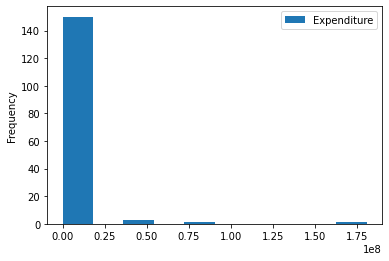

In [58]:
plt.figure(figsize=(25,25))
expnd_floats.plot.hist()
plt.show()

## Year for Annual Expenditure

In [59]:
df['Year for Annual Expenditure'].unique()

array([nan, 'FY 2018-19', 'FY 2019-20', 'FY 2017-18', 'FY 2016-17'],
      dtype=object)

In [60]:
years = df['Year for Annual Expenditure']

# Number of empty strings/missing values
print("Invalid:", sum(years == " ") + sum(years.isnull()) + sum(years == 0))

print("No. of unique values:", len(years.unique()))

# Check for duplicates
counter = dict(Counter(years))
duplicates = { key:[value] for key, value in counter.items() if value > 1}
print("No. of Duplicates:", len(duplicates))

table = pd.DataFrame.from_dict(duplicates)
table = table.melt(var_name="Duplicate Description", value_name="Count").sort_values(by=["Count"], ascending=False).reset_index(drop=True)
table

Invalid: 748
No. of unique values: 5
No. of Duplicates: 5


,Duplicate Description,Count
0,NaN,748
1,FY 2017-18,94
2,FY 2018-19,49
3,FY 2016-17,21
4,FY 2019-20,14


In [61]:
year_count = df['Year for Annual Expenditure'].value_counts().dropna()
year_count_df = pd.DataFrame(year_count)
year_count_df

,Year for Annual Expenditure
FY 2017-18,94
FY 2018-19,49
FY 2016-17,21
FY 2019-20,14


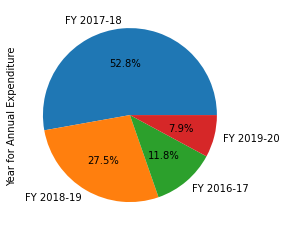

In [62]:
year_count.plot.pie(autopct="%.1f%%")
plt.show()

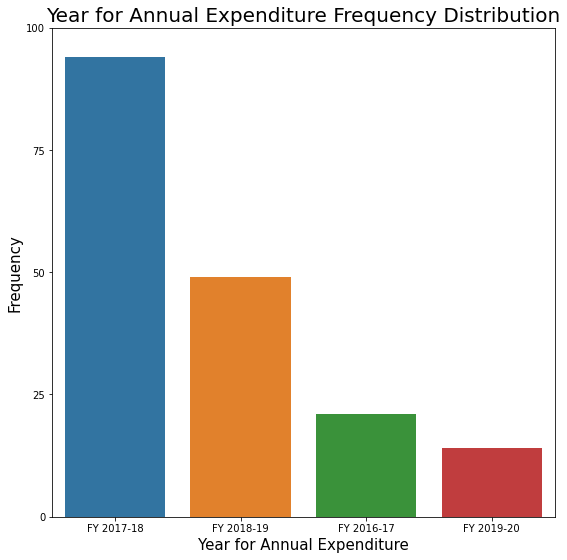

In [63]:
# Show frequency distribution of year for annual expenditures for NGOs
plt.figure(figsize=(9, 9))
ax = sns.barplot(x=year_count.index, y=year_count.values, data=year_count_df)
plt.xticks(np.arange(0, 4), size=10)
plt.yticks(np.arange(0, 115, 25), size=10)
plt.xlabel("Year for Annual Expenditure", size=15)
plt.ylabel("Frequency", size=15)
plt.title("Year for Annual Expenditure Frequency Distribution", size=20)
plt.show()

## Impact

In [64]:
impact = df['Impact']
impact.head()

0    The Strategic review and plan was done in year...
1    Financially steady zero-balance after operatio...
2                                                  NaN
3                                                  NaN
4    980 SCHOOLS GEO-MAPPED\nAll the 960 schools of...
Name: Impact, dtype: object

In [65]:
# Number of empty strings/missing values
print("Invalid:", sum(impact == " ") + sum(impact.isnull()) + sum(impact == 0))

print("No. of unique values:", len(impact.unique()))

# Check for duplicates
counter = dict(Counter(impact))
duplicates = { key:[value] for key, value in counter.items() if value > 1}
print("No. of Duplicates:", len(duplicates))

table = pd.DataFrame.from_dict(duplicates)
table = table.melt(var_name="Duplicate Impact", value_name="Count").sort_values(by=["Count"], ascending=False).reset_index(drop=True)
table

Invalid: 460
No. of unique values: 467
No. of Duplicates: 1


,Duplicate Impact,Count
0,NaN,460


## Profile Pic

In [66]:
pfp = df['Profile pic']
pfp.head()

0    https://www.givingtuesdayindia.org/civicrm/fil...
1                                                  NaN
2                                                  NaN
3                                                  NaN
4    https://www.givingtuesdayindia.org/civicrm/fil...
Name: Profile pic, dtype: object

In [67]:
# Number of empty strings/missing values
print("Invalid:", sum(pfp == " ") + sum(pfp.isnull()) + sum(pfp == 0))

print("No. of unique values:", len(pfp.unique()))

# Check for duplicates
counter = dict(Counter(pfp))
duplicates = { key:[value] for key, value in counter.items() if value > 1}
print("No. of Duplicates:", len(duplicates))

table = pd.DataFrame.from_dict(duplicates)
table = table.melt(var_name="Duplicate Profile Pic", value_name="Count").sort_values(by=["Count"], ascending=False).reset_index(drop=True)
table

Invalid: 740
No. of unique values: 187
No. of Duplicates: 1


,Duplicate Profile Pic,Count
0,NaN,740


Many organizations did not include the givingtuesday link to their profile picture. If included, the givingtuesday links are not operational anymore.

## Organisation Website

In [68]:
website = df['Organisation Website']
website.head()

0    http://www.sahajindia.org
1     http://www.divyarasa.org
2                          NaN
3                          NaN
4       http://www.17000ft.org
Name: Organisation Website, dtype: object

In [69]:
# Number of empty strings/missing values
print("Invalid:", sum(website == " ") + sum(website.isnull()) + sum(website == 0))

print("No. of unique values:", len(website.unique()))

# Check for duplicates
counter = dict(Counter(website))
duplicates = { key:[value] for key, value in counter.items() if value > 1}
print("No. of Duplicates:", len(duplicates))

table = pd.DataFrame.from_dict(duplicates)
table = table.melt(var_name="Duplicate Org Website", value_name="Count").sort_values(by=["Count"], ascending=False).reset_index(drop=True)
table

Invalid: 131
No. of unique values: 794
No. of Duplicates: 3


,Duplicate Org Website,Count
0,NaN,131
1,http://www.unnatiblr.org,2
2,http://www.srloveandcare.org/,2


In [70]:
duplicates = df[df['Organisation Website'].duplicated(keep=False) == True]
invalid_duplicates = duplicates[~df['Organisation Website'].isnull()].iloc[:,:13].sort_values('Organisation Website')
invalid_duplicates

/tmp/ipykernel_5361/319105470.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  invalid_duplicates = duplicates[~df['Organisation Website'].isnull()].iloc[:,:13].sort_values('Organisation Website')


,Url,NGO Name,Popular Name,Year of Establishment,GuideStar URL,Full Time Staff,Full Time Volunteers,Brief description,Annual Expenditure (Rs in lacs),Year for Annual Expenditure,Impact,Profile pic,Organisation Website
832,https://www.givingtuesdayindia.org/ngo-detail/...,Shrimad Rajchandra Jivadaya Trust,SRLC,2005,https://guidestarindia.org/Summary.aspx?CCReg=...,21.0,20.0,"Established in 2003, Shrimad Rajchandra Love a...",383.63,FY 2017-18,Shrimad Rajchandra Jivamaitridham is an animal...,NaN,http://www.srloveandcare.org/
833,https://www.givingtuesdayindia.org/ngo-detail/...,Shrimad Rajchandra Sarva Mangal Trust,SRLC,2003,https://guidestarindia.org/Summary.aspx?CCReg=...,200.0,300.0,"Established in 2003, Shrimad Rajchandra Love a...",2399.08,FY 2017-18,Programme: In 2018 Org served-\nHealth Care (A...,https://www.givingtuesdayindia.org/civicrm/fil...,http://www.srloveandcare.org/
629,https://www.givingtuesdayindia.org/ngo-detail/...,Shree Guruvayurappan Bhajan Samaj Trust,SGBS Trust,1993,https://guidestarindia.org/Summary.aspx?CCReg=...,10.0,30.0,Unemployment ‚ÄövÑv?‚àövë‚àö¬® it is believed ...,,NaN,NaN,NaN,http://www.unnatiblr.org
902,https://www.givingtuesdayindia.org/ngo-detail/...,SGBS Unnati Foundation,NaN,2011,https://guidestarindia.org/Summary.aspx?CCReg=...,150.0,0.0,SGBS cherishes its simple yet fulfilling visio...,436.37,FY 2017-18,"For FY 17-18 During the year, a total of 6,293...",https://www.givingtuesdayindia.org/civicrm/fil...,http://www.unnatiblr.org


Same organisation websites may not indicate duplicate rows. It seems that Shree Guruvayurappan Bhajan Samaj Trust and SGBS Unnati Foundation might also be associated organisations?

## Email

In [71]:
email = df['Email']
email.head()

0         admnsahaj@outlook.com
1    divyarasa555@divyarasa.org
2     sudhakarsankalp@gmail.com
3            kptvisha@gmail.com
4          reach.us@17000ft.org
Name: Email, dtype: object

In [72]:
# Number of empty strings/missing values
print("Invalid:", sum(email == " ") + sum(email.isnull()) + sum(email == 0))

print("No. of unique values:", len(email.unique()))

# Check for duplicates
counter = dict(Counter(email))
duplicates = { key:[value] for key, value in counter.items() if value > 1}
print("No. of Duplicates:", len(duplicates))

table = pd.DataFrame.from_dict(duplicates)
table = table.melt(var_name="Duplicate Emails", value_name="Count").sort_values(by=["Count"], ascending=False).reset_index(drop=True)
table

Invalid: 1
No. of unique values: 924
No. of Duplicates: 2


,Duplicate Emails,Count
0,socjust@gmail.com,2
1,loveandcare@shrimadrajchandramission.org,2


In [73]:
# Display duplicate emails
df.loc[df['Email'].isin(table['Duplicate Emails'])].iloc[:, :14].sort_values('Email')

,Url,NGO Name,Popular Name,Year of Establishment,GuideStar URL,Full Time Staff,Full Time Volunteers,Brief description,Annual Expenditure (Rs in lacs),Year for Annual Expenditure,Impact,Profile pic,Organisation Website,Email
831,https://www.givingtuesdayindia.org/ngo-detail/...,Shrimad Rajchandra Educational Trust,SRLC,2004,https://guidestarindia.org/Summary.aspx?CCReg=...,86.0,200.0,"Established in 2003, Shrimad Rajchandra Love a...",723.59,FY 2017-18,"As of FY 18-19, over 300 students are studying...",https://www.givingtuesdayindia.org/civicrm/fil...,http://www.shrimadrajchandramission.org,loveandcare@shrimadrajchandramission.org
833,https://www.givingtuesdayindia.org/ngo-detail/...,Shrimad Rajchandra Sarva Mangal Trust,SRLC,2003,https://guidestarindia.org/Summary.aspx?CCReg=...,200.0,300.0,"Established in 2003, Shrimad Rajchandra Love a...",2399.08,FY 2017-18,Programme: In 2018 Org served-\nHealth Care (A...,https://www.givingtuesdayindia.org/civicrm/fil...,http://www.srloveandcare.org/,loveandcare@shrimadrajchandramission.org
323,https://www.givingtuesdayindia.org/ngo-detail/...,Janvikas,Janvikas,1985,https://guidestarindia.org/Summary.aspx?CCReg=...,NaN,NaN,NaN,,NaN,NaN,NaN,http://www.giveindia.org/GetOrganisationProfil...,socjust@gmail.com
876,https://www.givingtuesdayindia.org/ngo-detail/...,Institute For Development Education and Learni...,Centre For Social Justice,1993,https://guidestarindia.org/Summary.aspx?CCReg=...,51.0,0.0,"IDEAL ‚Äì Centre for Social Justice, establish...",377.15952,FY 2017-18,IDEAL is successfully provided direct services...,https://www.givingtuesdayindia.org/civicrm/fil...,http://www.centreforsocialjustice.net/,socjust@gmail.com


The last two duplicate values may not indicate the same organisation (Janvikas and Institute For Development Education and Learning (IDEAL)).

In [74]:
df.loc[df['Email'].isnull() == True]

,Url,NGO Name,Popular Name,Year of Establishment,GuideStar URL,Full Time Staff,Full Time Volunteers,Brief description,Annual Expenditure (Rs in lacs),Year for Annual Expenditure,...,Email,Telephone/ Mobile number,Correspondence Address,Phone,Cause(s),Nature of Intervention,Beneficairies,Focus,Area of Operation: State,PAN
466,https://www.givingtuesdayindia.org/ngo-detail/...,OSCAR(Organisation for Social Change Awareness...,OSCAR,2010,https://guidestarindia.org/Summary.aspx?CCReg=...,53.0,20.0,"The Organisation for Social Change, Awareness ...",,NaN,...,NaN,NaN,"301/302, 3rd Floor, Malhotra Chambers, 31/33 P...",NaN,"Children, Education, Sports, Youth",Direct service,"Adolescents, Children, Girl Child, Students, V...",Urban,DelhiJharkhandKarnatakaMaharashtra,AAATO2812J


## Telephone/ Mobile number

In [75]:
column=df['Telephone/ Mobile number']
column.head()

0              NaN
1    91-9176300657
2    91-9096696633
3    91-9438022310
4    91-9871100334
Name: Telephone/ Mobile number, dtype: object

In [76]:
# Number of missing values
print("Nulls:", sum(column.isnull()))

print("No. of unique values:", len(column.unique()))

# Check for duplicates
counter = dict(Counter(column))
duplicates = { key:[value] for key, value in counter.items() if value > 1}
print("No. of Duplicates:", len(duplicates))

table = pd.DataFrame.from_dict(duplicates)
table = table.melt(var_name="Duplicate Mobile numbers", value_name="Count").sort_values(by=["Count"], ascending=False).reset_index(drop=True)
table

Nulls: 253
No. of unique values: 671
No. of Duplicates: 4


,Duplicate Mobile numbers,Count
0,NaN,253
1,91-9421642403,2
2,91-9650730860,2
3,91-9844085864,2


In [77]:
a = df.loc[df['Telephone/ Mobile number'].isin(table['Duplicate Mobile numbers'])].iloc[:, [0, 1, 14]].copy()
a[~a['Telephone/ Mobile number'].isnull()].sort_values('Telephone/ Mobile number')

,Url,NGO Name,Telephone/ Mobile number
137,https://www.givingtuesdayindia.org/ngo-detail/...,CENTRE FOR AGRICULTURE AND RURAL DEVELOPMENT(C...,91-9421642403
200,https://www.givingtuesdayindia.org/ngo-detail/...,DNYANJYOTI GRAMIN VIKAS MANDAL,91-9421642403
154,https://www.givingtuesdayindia.org/ngo-detail/...,CHIKITSA,91-9650730860
830,https://www.givingtuesdayindia.org/ngo-detail/...,SHIKSHA,91-9650730860
629,https://www.givingtuesdayindia.org/ngo-detail/...,Shree Guruvayurappan Bhajan Samaj Trust,91-9844085864
902,https://www.givingtuesdayindia.org/ngo-detail/...,SGBS Unnati Foundation,91-9844085864


Duplicate phone numbers do not indicate duplicate rows.

## Correspondence Address

In [78]:
column=df['Correspondence  Address']
# Number of missing values
print("Nulls:", sum(column.isnull()))

print("No. of unique values:", len(column.unique()))

# Check for duplicates
counter = dict(Counter(column))
duplicates = { key:[value] for key, value in counter.items() if value > 1}
print("No. of Duplicates:", len(duplicates))

table = pd.DataFrame.from_dict(duplicates)
table = table.melt(var_name="Duplicate Mobile numbers", value_name="Count").sort_values(by=["Count"], ascending=False).reset_index(drop=True)
table

Nulls: 72
No. of unique values: 855
No. of Duplicates: 1


,Duplicate Mobile numbers,Count
0,NaN,72


Addresses are not all consistent.

## Phone

In [79]:
# Number of missing values
print("Nulls:", sum(df['Phone'].isnull()))

Nulls: 807


Column contain multiple phone numbers with varying lengths and formats.

In [80]:
# removing hyphens and dropping nulls
cleaned = df.replace('-', '', regex=True)
cleaned['Phone'] = cleaned['Phone'].dropna()
cleaned.head()

,Url,NGO Name,Popular Name,Year of Establishment,GuideStar URL,Full Time Staff,Full Time Volunteers,Brief description,Annual Expenditure (Rs in lacs),Year for Annual Expenditure,...,Email,Telephone/ Mobile number,Correspondence Address,Phone,Cause(s),Nature of Intervention,Beneficairies,Focus,Area of Operation: State,PAN
0,https://www.givingtuesdayindia.org/ngodetail/3...,`Sahaj' (An Organisation for Women's Development),Sahaj,2001,https://guidestarindia.org/Summary.aspx?CCReg=...,70.0,NaN,Sahaj is an organization working for skill dev...,,NaN,...,admnsahaj@outlook.com,NaN,"Desai Automobile Compound,\nGarbada Road, Pada...","912673245215, 912673245215","Community Development, Education, Healthcare, ...",Direct service,"Children, Girl Child, Dalits, Artisans, Rural ...",Rural,Gujarat,AACTS0036Q
1,https://www.givingtuesdayindia.org/ngodetail/2...,"""DIVYA RASA"" (Centre for Healing, Learning, Re...",Divya Rasa Temple of Love,2015,https://guidestarindia.org/Summary.aspx?CCReg=...,3.0,5.0,Divya Rasa is an NGO dedicated to serve autist...,,NaN,...,divyarasa555@divyarasa.org,919176300657,"Divya Rasa Temple of Love, Su Kilnachipattu,\...",NaN,Education,Direct service,"Children, Adolescents, Adults, Volunteers",Rural & Urban,Tamil Nadu,AACTD2691L
2,https://www.givingtuesdayindia.org/ngodetail/2...,"""Sankalp"" Manav Vikas Sanstha",NaN,1992,https://guidestarindia.org/Summary.aspx?CCReg=...,NaN,NaN,Sankalp Manav Vikas Sanstha is a registered or...,,NaN,...,sudhakarsankalp@gmail.com,919096696633,"Sudhakar Kshirsagar,Gautam Nagar Pathari,\nPat...",NaN,"Children, Community Development, Education, He...",Advocacy & Campaigning,"Physically Challenged, Children, Girl Child, A...",Rural & Urban,NaN,AAETS2349N
3,https://www.givingtuesdayindia.org/ngodetail/3...,"""VISHA"" VOCATIONAL INSTITUTES SOCIAL,HEALTH AN...",VISHA NGO,2012,https://guidestarindia.org/Summary.aspx?CCReg=...,3.0,23.0,"Vocational Institutes Social,Health and Agricu...",,NaN,...,kptvisha@gmail.com,919438022310,"Goutam Nagar Last Lane,,\nkoraput Koraput, ...",NaN,"Children, Education, Healthcare, Livelihoods, ...","Support, Network, Direct service","Children, Girl Child, Adolescents, Dalits, Adu...",Rural & Urban,Odisha,AACTV0963D
4,https://www.givingtuesdayindia.org/ngodetail/3...,17000 ft Foundation,17000 ft,2012,https://guidestarindia.org/Summary.aspx?CCReg=...,29.0,0.0,17000 ft Foundation is a Not for profit setup ...,,FY 201819,...,reach.us@17000ft.org,919871100334,NaN,NaN,Education,"Direct service, Support","Adolescents, Children, Girl Child, Rural Poor,...",Rural,Jammu and Kashmir,AAACZ5957C


In [81]:
# splitting the multiple phone numbers into their own row
cleaned_numbers = cleaned['Phone'].str.split(',').apply(pd.Series)
cleaned_numbers.index = cleaned['NGO Name']
cleaned_numbers = cleaned_numbers.stack().reset_index('NGO Name')
cleaned_numbers.rename(columns={0: 'Phone'}, inplace=True)
cleaned_numbers.head()

,NGO Name,Phone
0,`Sahaj' (An Organisation for Women's Development),912673245215
1,`Sahaj' (An Organisation for Women's Development),912673245215
0,aaina,916742360630
1,aaina,916742360631
0,AAS Samiti,919827300186


In [82]:
column=cleaned_numbers['Phone']

print("No. of unique values:", len(column.unique()))

# Check for duplicates
counter = dict(Counter(column))
duplicates = { key:[value] for key, value in counter.items() if value > 1}
print("No. of Duplicates:", len(duplicates))

# Length of numbers
print("Lengths:", column.apply(len).unique())

table = pd.DataFrame.from_dict(duplicates)
table = table.melt(var_name="Duplicate Phone numbers", value_name="Count").sort_values(by=["Count"], ascending=False).reset_index(drop=True)
table

No. of unique values: 292
No. of Duplicates: 3
Lengths: [12 13]


,Duplicate Phone numbers,Count
0,912228353880,2
1,918748285255,2
2,912302397121,2


## Cause(s)

In [83]:
column=df['Cause(s)']
# Number of missing values
print("Nulls:", sum(column.isnull()))
print("Some organisations have multiple causes.")

Nulls: 27
Some organisations have multiple causes.


In [84]:
# splitting the multiple causes into a row
cleaned = df['Cause(s)'].str.split(',').apply(pd.Series)
cleaned.index = df['NGO Name']
cleaned = cleaned.stack().reset_index('NGO Name')
cleaned.rename(columns={0: 'Cause'}, inplace=True)
cleaned.head()

,NGO Name,Cause
0,`Sahaj' (An Organisation for Women's Development),Community Development
1,`Sahaj' (An Organisation for Women's Development),Education
2,`Sahaj' (An Organisation for Women's Development),Healthcare
3,`Sahaj' (An Organisation for Women's Development),Livelihoods
4,`Sahaj' (An Organisation for Women's Development),Women


In [85]:
cleaned_col = cleaned['Cause']
print("No. of unique values:", len(cleaned_col.unique()))

# Check for duplicates
counter = dict(Counter(cleaned_col))
duplicates = { key:[value] for key, value in counter.items() if value > 1}
print("No. of Duplicates:", len(duplicates))

table = pd.DataFrame.from_dict(duplicates)
table = table.melt(var_name="Duplicate Cause", value_name="Count").sort_values(by=["Count"], ascending=False).reset_index(drop=True)
table.head()

No. of unique values: 39
No. of Duplicates: 36


,Duplicate Cause,Count
0,Children,374
1,Education,333
2,Healthcare,322
3,Women,315
4,Livelihoods,275


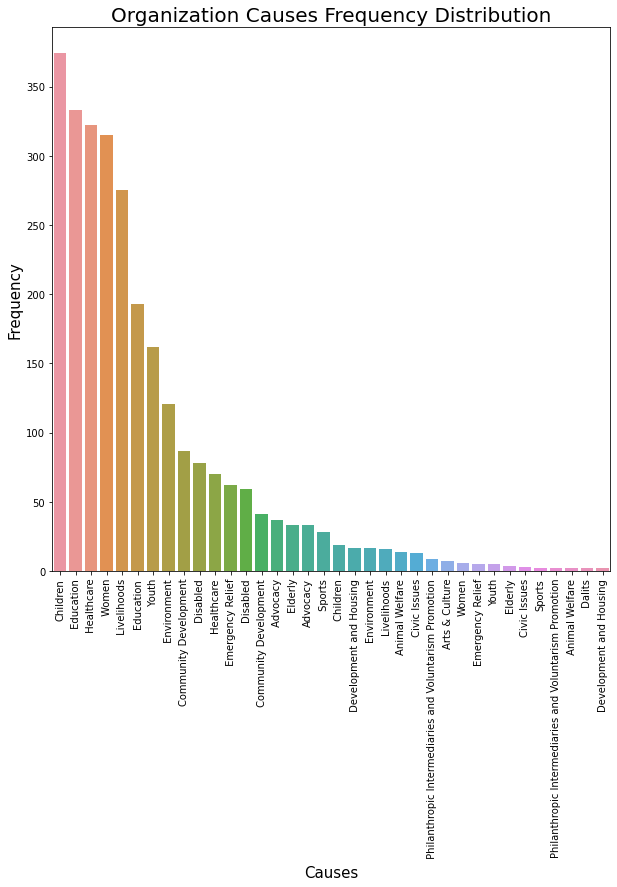

In [86]:
# Show frequency distribution of year for NGO causes
plt.figure(figsize=(10, 10))
ax = sns.barplot(x=table['Duplicate Cause'], y=table['Count'], data=table)
plt.xticks(size=10, rotation=90)
plt.yticks(size=10)
plt.xlabel("Causes", size=15)
plt.ylabel("Frequency", size=15)
plt.title("Organization Causes Frequency Distribution", size=20)
plt.show()

## Nature of Intervention

In [87]:
column=df['Nature of Intervention']
# Number of missing values
print("Nulls:", sum(column.isnull()))
print("Some organisations have multiple values under Nature of Intervention.")

Nulls: 14
Some organisations have multiple values under Nature of Intervention.


In [88]:
# splitting the multiple causes into a row
cleaned = column.str.split(',').apply(pd.Series)
cleaned.index = df['NGO Name']
cleaned = cleaned.stack().reset_index('NGO Name')
cleaned.rename(columns={0: 'Nature of Intervention'}, inplace=True)
cleaned['Nature of Intervention'] = cleaned['Nature of Intervention'].dropna()

# trimming leading and trailing white space
cleaned['Nature of Intervention'] = cleaned['Nature of Intervention'].astype(str)
cleaned['Nature of Intervention'] = cleaned['Nature of Intervention'].str.strip()
cleaned.head()

,NGO Name,Nature of Intervention
0,`Sahaj' (An Organisation for Women's Development),Direct service
0,"""DIVYA RASA"" (Centre for Healing, Learning, Re...",Direct service
0,"""Sankalp"" Manav Vikas Sanstha",Advocacy & Campaigning
0,"""VISHA"" VOCATIONAL INSTITUTES SOCIAL,HEALTH AN...",Support
1,"""VISHA"" VOCATIONAL INSTITUTES SOCIAL,HEALTH AN...",Network


In [89]:
cleaned_col = cleaned['Nature of Intervention']
print("No. of unique values:", len(cleaned_col.unique()))

# Check for duplicates
counter = dict(Counter(cleaned_col))
duplicates = { key:[value] for key, value in counter.items() if value > 1}
print("No. of Duplicates:", len(duplicates))

table = pd.DataFrame.from_dict(duplicates)
table = table.melt(var_name="Duplicate Intervention", value_name="Count").sort_values(by=["Count"], ascending=False).reset_index(drop=True)
table

No. of unique values: 6
No. of Duplicates: 6


,Duplicate Intervention,Count
0,Direct service,788
1,Support,487
2,Advocacy & Campaigning,383
3,Network,290
4,Intermediary,124
5,Grant-making,105


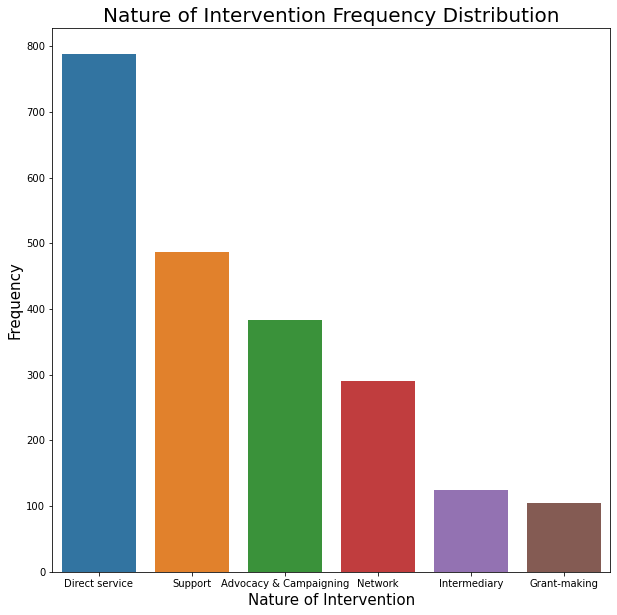

In [90]:
# Show frequency distribution of year for NGO causes
plt.figure(figsize=(10, 10))
ax = sns.barplot(x=table['Duplicate Intervention'], y=table['Count'], data=table)
plt.xticks(size=10)
plt.yticks(size=10)
plt.xlabel("Nature of Intervention", size=15)
plt.ylabel("Frequency", size=15)
plt.title("Nature of Intervention Frequency Distribution", size=20)
plt.show()

## Beneficiaries

In [91]:
# renaming column name to correct spelling
df.rename(columns={'Beneficairies': 'Beneficiaries'}, inplace=True)
df.Beneficiaries.head()

0    Children, Girl Child, Dalits, Artisans, Rural ...
1            Children, Adolescents, Adults, Volunteers
2    Physically Challenged, Children, Girl Child, A...
3    Children, Girl Child, Adolescents, Dalits, Adu...
4    Adolescents, Children, Girl Child, Rural Poor,...
Name: Beneficiaries, dtype: object

In [92]:
column=df['Beneficiaries']
# Number of missing values
print("Nulls:", sum(column.isnull()))
print("Some organisations have multiple values under Beneficiaries.")

Nulls: 26
Some organisations have multiple values under Beneficiaries.


In [93]:
# splitting the multiple causes into a row
cleaned = column.str.split(',').apply(pd.Series)
cleaned.index = df['NGO Name']
cleaned = cleaned.stack().reset_index('NGO Name')
cleaned.rename(columns={0: 'Beneficiaries'}, inplace=True)
cleaned['Beneficiaries'] = cleaned['Beneficiaries'].dropna()
cleaned.head()

,NGO Name,Beneficiaries
0,`Sahaj' (An Organisation for Women's Development),Children
1,`Sahaj' (An Organisation for Women's Development),Girl Child
2,`Sahaj' (An Organisation for Women's Development),Dalits
3,`Sahaj' (An Organisation for Women's Development),Artisans
4,`Sahaj' (An Organisation for Women's Development),Rural Poor


In [94]:
cleaned_col = cleaned['Beneficiaries']
print("No. of unique values:", len(cleaned_col.unique()))

# Check for duplicates
counter = dict(Counter(cleaned_col))
duplicates = { key:[value] for key, value in counter.items() if value > 1}
print("No. of Duplicates:", len(duplicates))

table = pd.DataFrame.from_dict(duplicates)
table = table.melt(var_name="Duplicate Beneficiaries", value_name="Count").sort_values(by=["Count"], ascending=False).reset_index(drop=True)
table.head(10)

No. of unique values: 103
No. of Duplicates: 94


,Duplicate Beneficiaries,Count
0,Women,561
1,Youth,490
2,Rural Poor,401
3,Girl Child,401
4,Students,401
5,Children,386
6,Adults,349
7,Children,248
8,NGOs,248
9,Adolescents,247


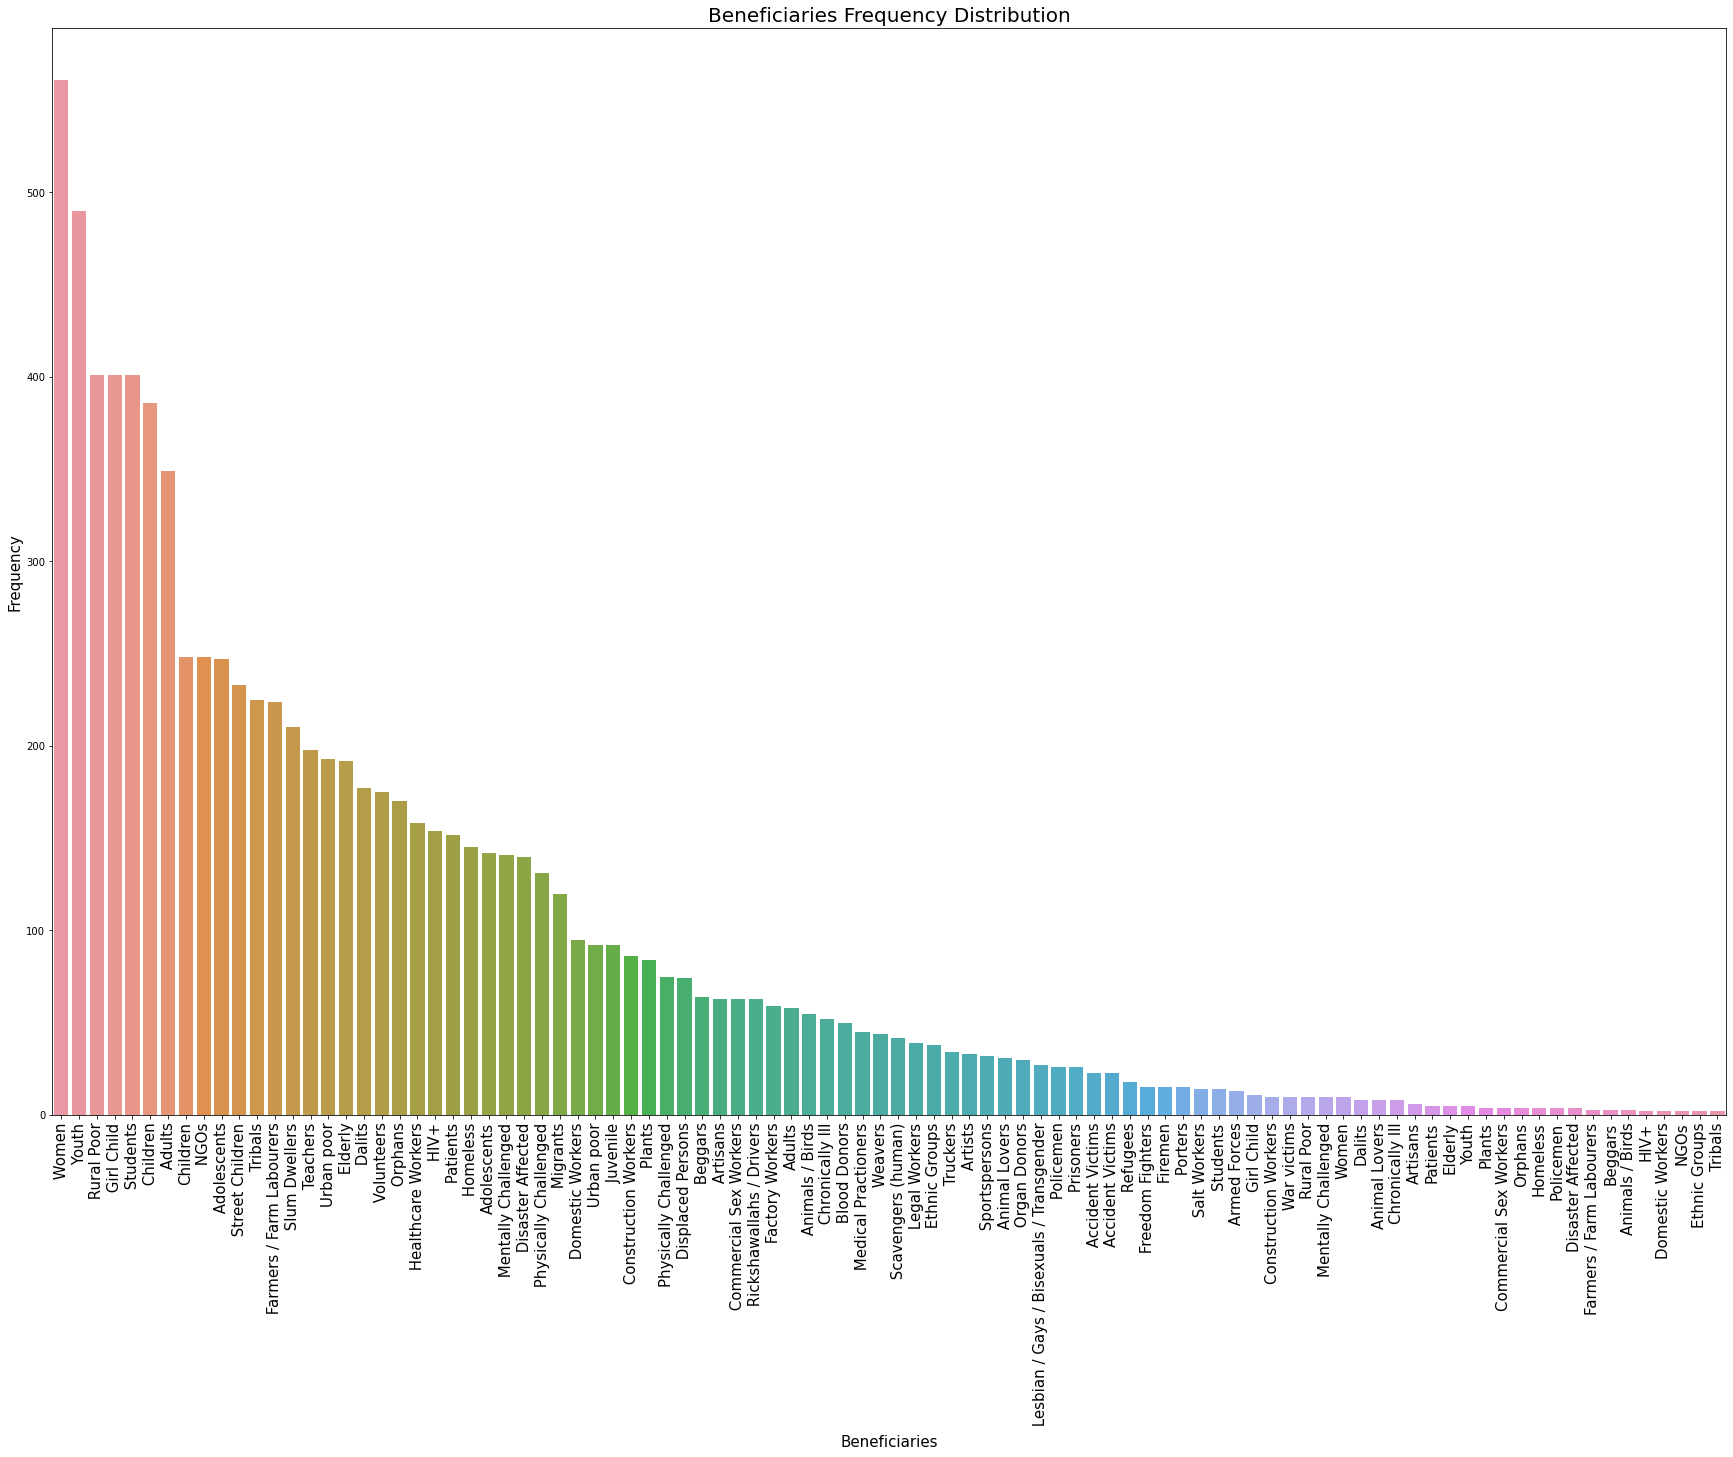

In [95]:
# Show frequency distribution of year for NGO causes
plt.figure(figsize=(30, 20))
ax = sns.barplot(x=table['Duplicate Beneficiaries'], y=table['Count'], data=table)
plt.xticks(size=15, rotation=90)
plt.yticks(size=10)
plt.xlabel("Beneficiaries", size=15)
plt.ylabel("Frequency", size=15)
plt.title("Beneficiaries Frequency Distribution", size=20)
plt.show()

## Focus

In [96]:
column=df['Focus']
# Number of missing values
print("Nulls:", sum(column.isnull()))

print("No. of unique values:", len(column.unique()))

# Check for duplicates
counter = dict(Counter(column))
duplicates = { key:[value] for key, value in counter.items() if value > 1}
print("No. of Duplicates:", len(duplicates))

table = pd.DataFrame.from_dict(duplicates)
table = table.melt(var_name="Duplicate Focus", value_name="Count").sort_values(by=["Count"], ascending=False).reset_index(drop=True)
table

Nulls: 33
No. of unique values: 4
No. of Duplicates: 4


,Duplicate Focus,Count
0,Rural & Urban,619
1,Rural,189
2,Urban,85
3,NaN,33


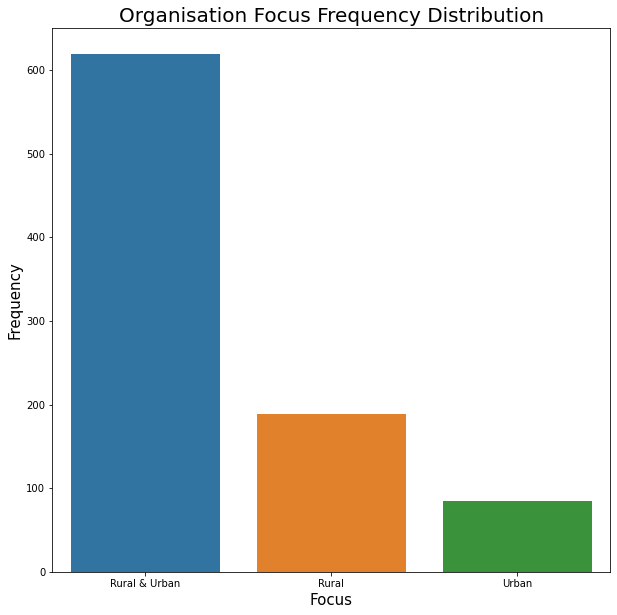

In [97]:
# Show frequency distribution of year for NGO causes
plt.figure(figsize=(10, 10))
ax = sns.barplot(x=table['Duplicate Focus'], y=table['Count'], data=table)
plt.xticks(size=10)
plt.yticks(size=10)
plt.xlabel("Focus", size=15)
plt.ylabel("Frequency", size=15)
plt.title("Organisation Focus Frequency Distribution", size=20)
plt.show()

## Area of Operation: State

In [103]:
column=df['Area of Operation: State']
column

0                       Gujarat
1                    Tamil Nadu
2                           NaN
3                        Odisha
4             Jammu and Kashmir
                 ...           
921       ChhattisgarhKarnataka
922                   All India
923                  Tamil Nadu
924                 Maharashtra
925    Andhra PradeshPuducherry
Name: Area of Operation: State, Length: 926, dtype: object

In [98]:
column=df['Area of Operation: State']
# Number of missing values
print("Nulls:", sum(column.isnull()))

print("No. of unique values:", len(column.unique()))

# Check for duplicates
counter = dict(Counter(column))
duplicates = { key:[value] for key, value in counter.items() if value > 1}
print("No. of Duplicates:", len(duplicates))

table = pd.DataFrame.from_dict(duplicates)
table = table.melt(var_name="Duplicate Mobile numbers", value_name="Count").sort_values(by=["Count"], ascending=False).reset_index(drop=True)
table.head()

Nulls: 150
No. of unique values: 140
No. of Duplicates: 37


,Duplicate Mobile numbers,Count
0,NaN,150
1,All India,133
2,Maharashtra,118
3,Tamil Nadu,63
4,West Bengal,55


## PAN

In [101]:
column=df['PAN']
column

0      AACTS0036Q
1      AACTD2691L
2      AAETS2349N
3      AACTV0963D
4      AAACZ5957C
          ...    
921    AABCC6926B
922    AAABM0639H
923    AABTM6702C
924    AAATC1150F
925    AAATU3766H
Name: PAN, Length: 926, dtype: object

In [102]:
# Number of missing values
print("Nulls:", sum(column.isnull()))

print("No. of unique values:", len(column.unique()))

# Check for duplicates
counter = dict(Counter(column))
duplicates = { key:[value] for key, value in counter.items() if value > 1}
print("No. of Duplicates:", len(duplicates))

Nulls: 0
No. of unique values: 926
No. of Duplicates: 0
